Study about Sentiment Analysis

#Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install NLTK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
saljur = pd.read_csv('/content/drive/My Drive/dataset/salahjurusan.csv')
saljur.head()

,Unnamed: 0,akun,tweets,likes,followers
0,0,tyaranzz,@tanyakanrl GUE GELISAH BGT TIAP MIKIRIN KULIA...,0,415
1,1,greslxlx,@Anton22a dibilang u salah jurusan 🙏 yg laen d...,0,36
2,2,_vsty,@autandiminum Owalahh 😢 Susah sih kalo ga ada ...,0,113
3,3,sukamojitoleci,RT @Selasarabu_: Untuk masnya yang naik dari J...,0,4
4,4,brcdella,"@amortentialoha @jek___ Sedih bgt😅😅🥲, jadi ing...",0,65


In [4]:
saljur.shape

(2000, 5)

In [5]:
saljur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   akun        2000 non-null   object
 2   tweets      2000 non-null   object
 3   likes       2000 non-null   int64 
 4   followers   2000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 78.2+ KB


In [6]:
saljur.isnull().sum()

Unnamed: 0    0
akun          0
tweets        0
likes         0
followers     0
dtype: int64

#Processing Data

In [7]:
saljur1 = saljur.drop(['Unnamed: 0','akun','likes','followers'], axis = 1)
saljur1.head()

,tweets
0,@tanyakanrl GUE GELISAH BGT TIAP MIKIRIN KULIA...
1,@Anton22a dibilang u salah jurusan 🙏 yg laen d...
2,@autandiminum Owalahh 😢 Susah sih kalo ga ada ...
3,RT @Selasarabu_: Untuk masnya yang naik dari J...
4,"@amortentialoha @jek___ Sedih bgt😅😅🥲, jadi ing..."


In [10]:
import re
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
saljur1["tweets"] = saljur1["tweets"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
saljur1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in saljur1["tweets"]]
saljur1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in saljur1["tweets"]]
saljur1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in saljur1["tweets"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [12]:
saljur1

,tweets,Positive,Negative,Neutral
0,tanyakanrl gue gelisah bgt tiap mikirin kuliah...,0.000,0.0,1.000
1,dibilang u salah jurusan 🙏 yg laen dikpus w l...,0.000,0.0,1.000
2,autandiminum owalahh 😢 susah sih kalo ga ada p...,0.143,0.0,0.857
3,rt selasarabu untuk masnya yang naik dari jogj...,0.000,0.0,1.000
4,amortentialoha jek sedih bgt😅😅🥲 jadi inget dul...,0.000,0.0,1.000
...,...,...,...,...
1995,campus kalo kalian merasa salah jurusan tapi u...,0.000,0.0,1.000
1996,hostingpangeran didirikan oleh salah satu peng...,0.000,0.0,1.000
1997,terlepa dari emang salah jurusan yaudah lah ja...,0.000,0.0,1.000
1998,ga ada ahklaq rmag salah satu driver jaklingk...,0.000,0.0,1.000


In [13]:
data = saljur1[['tweets', 'Positive', 'Negative', 'Neutral']]
print(data.head())

                                              tweets  Positive  Negative  \
0  tanyakanrl gue gelisah bgt tiap mikirin kuliah...     0.000       0.0   
1   dibilang u salah jurusan 🙏 yg laen dikpus w l...     0.000       0.0   
2  autandiminum owalahh 😢 susah sih kalo ga ada p...     0.143       0.0   
3  rt selasarabu untuk masnya yang naik dari jogj...     0.000       0.0   
4  amortentialoha jek sedih bgt😅😅🥲 jadi inget dul...     0.000       0.0   

   Neutral  
0    1.000  
1    1.000  
2    0.857  
3    1.000  
4    1.000  


In [14]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  10.526
Negative:  5.415000000000001
Neutral:  1984.0610000000004


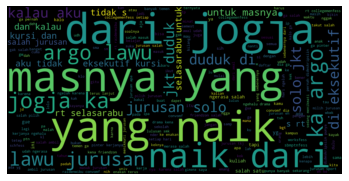

In [15]:
from pandas.core.common import random_state
from wordcloud import WordCloud

words = ' '.join([twts for twts in saljur1['tweets']])
wordcloud = WordCloud(width = 1600, height=800, max_font_size=200, mode="RGB").generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Case folding

In [16]:
import re
def clean(text):
  text = re.sub('[^A-Za-z]+',' ',text)
  return text

saljur2 = saljur1['tweets'].apply(clean)
saljur2

0       tanyakanrl gue gelisah bgt tiap mikirin kuliah...
1        dibilang u salah jurusan yg laen dikpus w lib...
2       autandiminum owalahh susah sih kalo ga ada pas...
3       rt selasarabu untuk masnya yang naik dari jogj...
4       amortentialoha jek sedih bgt jadi inget dulu p...
                              ...                        
1995    campus kalo kalian merasa salah jurusan tapi u...
1996    hostingpangeran didirikan oleh salah satu peng...
1997    terlepa dari emang salah jurusan yaudah lah ja...
1998    ga ada ahklaq rmag salah satu driver jaklingko...
1999    gajadi salah jurusan msdm ilmu yang menyenangk...
Name: tweets, Length: 2000, dtype: object

Referensi

https://thecleverprogrammer.com/2021/09/13/twitter-sentiment-analysis-using-python/